<a href="https://colab.research.google.com/github/amgito1648/clase-inteligencia-artificial/blob/main/cuaderno4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

06/03/2025

#Cuaderno 4

valores atipicos.

3 metodos para detectar los outliers Boxplot (Diagrama de Cajas),Z-Score (Puntuación Estándar), Puntuaciones IQR (Rango Intercuartílico)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset simulado
np.random.seed(42)
data = pd.DataFrame({
    "Edad": np.random.normal(30, 10, 100).tolist() + [100, 120],  # Valores atípicos
    "Ingresos": np.random.normal(50000, 15000, 100).tolist() + [200000, 250000]
})
data

,Edad,Ingresos
0,34.967142,28769.438869
1,28.617357,43690.320159
2,36.476885,44859.282252
3,45.230299,37965.840962
4,27.658466,47580.714325
...,...,...
97,32.610553,52305.876589
98,30.051135,50873.130777
99,27.654129,32855.445533
100,100.000000,200000.000000


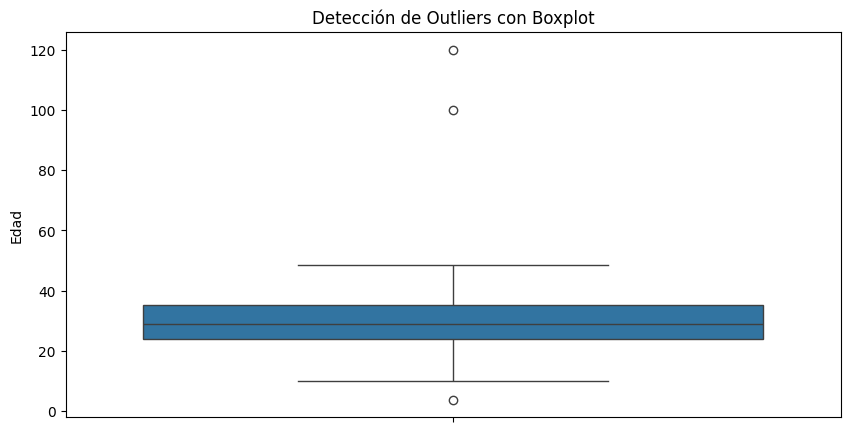

In [2]:
# Visualizar con boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y="Edad")
plt.title("Detección de Outliers con Boxplot")
plt.show()

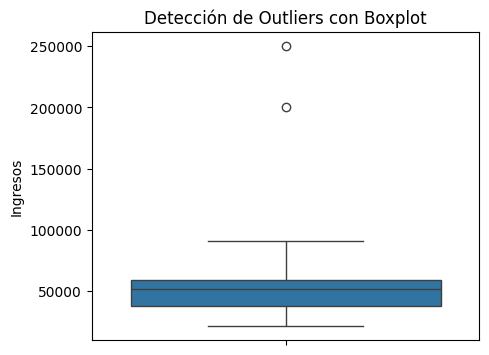

In [4]:
# Visualizar con boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, y="Ingresos")
plt.title("Detección de Outliers con Boxplot")
plt.show()



In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,102.0,30.550524,14.502355,3.802549,24.089491,29.061708,35.091291,120.0
Ingresos,102.0,53759.381182,28376.604542,21218.431771,38037.180875,51900.323533,59239.471764,250000.0


In [6]:
RIQEdad= data["Edad"].quantile(0.75) - data["Edad"].quantile(0.25)
RIQIngresos= data["Ingresos"].quantile(0.75) - data["Ingresos"].quantile(0.25)
BSEdad = data["Edad"].quantile(0.75) + 1.5 * RIQEdad
BSIngresos = data["Ingresos"].quantile(0.75) +1.5 * RIQIngresos
print(f"Bigote Superior Edad: {BSEdad}")
print(f"Bigote Superior Ingresos: {RIQIngresos}")
BIedad= data["Edad"].quantile(0.25) - 1.5 * RIQEdad
BIIngresos= data["Ingresos"].quantile(0.25) - 1.5 * RIQIngresos
print(f"Bigote Inferior Edad: {BIedad}")
print(f"Bigote Inferior Ingresos: {BIIngresos}")

Bigote Superior Edad: 51.59399132343582
Bigote Superior Ingresos: 21202.290889111442
Bigote Inferior Edad: 7.586790809948955
Bigote Inferior Ingresos: 6233.744541328731


In [9]:
from scipy.stats import zscore

# Calcular Z-Score
data["Edad_Zscore"] = zscore(data["Edad"])
data["Ingresos_Zscore"] = zscore(data["Ingresos"])

# Filtrar outliers
outliers = data[(data["Edad_Zscore"].abs() > 3) | (data["Ingresos_Zscore"].abs() > 3)]
print("\nOutliers detectados con Z-Score:")
print(outliers)





Outliers detectados con Z-Score:
      Edad  Ingresos  Edad_Zscore  Ingresos_Zscore
100  100.0  200000.0     4.812490         5.179013
101  120.0  250000.0     6.198387         6.949729


In [11]:
# Eliminar outliers basados en IQR
# Calculate lower and upper bounds using IQR
RIQEdad = data["Edad"].quantile(0.75) - data["Edad"].quantile(0.25)
lower_bound = data["Edad"].quantile(0.25) - 1.5 * RIQEdad
upper_bound = data["Edad"].quantile(0.75) + 1.5 * RIQEdad

data_cleaned = data[(data["Edad"] >= lower_bound) & (data["Edad"] <= upper_bound)]
print("\nDatos después de eliminar outliers:")
print(data_cleaned)


Datos después de eliminar outliers:
         Edad      Ingresos  Edad_Zscore  Ingresos_Zscore
0   34.967142  28769.438869     0.306049        -0.885002
1   28.617357  43690.320159    -0.133959        -0.356589
2   36.476885  44859.282252     0.410666        -0.315191
3   45.230299  37965.840962     1.017233        -0.559318
4   27.658466  47580.714325    -0.200405        -0.218813
..        ...           ...          ...              ...
95  15.364851  55779.760696    -1.052289         0.071550
96  32.961203  36742.138457     0.167048        -0.602654
97  32.610553  52305.876589     0.142749        -0.051475
98  30.051135  50873.130777    -0.034605        -0.102215
99  27.654129  32855.445533    -0.200705        -0.740299

[99 rows x 4 columns]


In [22]:
data["Edad_Winsorized"] = data["Edad"].clip(lower=lower_bound, upper=upper_bound)
data["Ingresos_Winsorized"] = data["Ingresos"].clip(lower=BIIngresos, upper=BSIngresos)
data["Edad_Winsorized"] = data["Edad"].clip(lower=lower_bound, upper=upper_bound)
data["Ingresos_Winsorized"] = data["Ingresos"].clip(lower=BIIngresos, upper=BSIngresos)
print("\nDatos después de Winsorización:")
print(data[["Edad", "Edad_Winsorized", "Ingresos", "Ingresos_Winsorized"]])


Datos después de Winsorización:
           Edad  Edad_Winsorized       Ingresos  Ingresos_Winsorized
0     34.967142        34.967142   28769.438869         28769.438869
1     28.617357        28.617357   43690.320159         43690.320159
2     36.476885        36.476885   44859.282252         44859.282252
3     45.230299        45.230299   37965.840962         37965.840962
4     27.658466        27.658466   47580.714325         47580.714325
..          ...              ...            ...                  ...
97    32.610553        32.610553   52305.876589         52305.876589
98    30.051135        30.051135   50873.130777         50873.130777
99    27.654129        27.654129   32855.445533         32855.445533
100  100.000000        51.593991  200000.000000         91042.908098
101  120.000000        51.593991  250000.000000         91042.908098

[102 rows x 4 columns]


/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


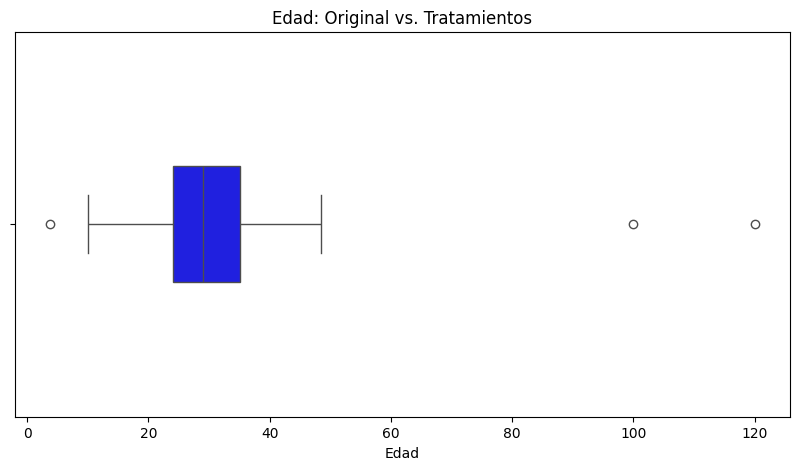

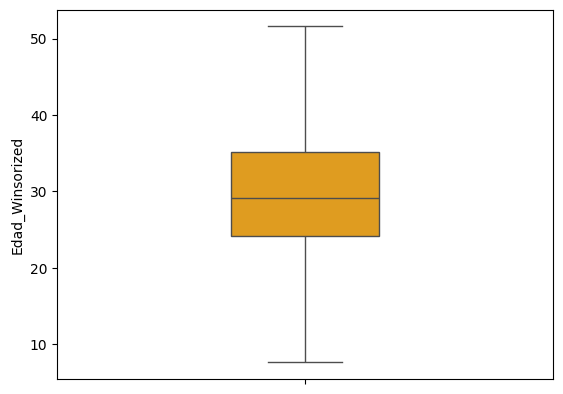

KeyError: 'Edad_Imputed'

In [24]:
# Visualizar resultados
plt.figure(figsize=(10, 5))

# Original
sns.boxplot(x=data["Edad"], color="blue", width=0.3, orient="v")
plt.title("Edad: Original vs. Tratamientos")
plt.show()

# Winsorización
sns.boxplot(y=data["Edad_Winsorized"], color="orange", width=0.3, orient="v")
plt.show()

# Imputación
sns.boxplot(y=data["Edad_Imputed"], color="green", width=0.3, orient="v")
plt.show()
